# U.S. Medical Insurance Costs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
insurance = pd.read_csv('insurance.csv')

In [3]:
print(insurance.info())
print("")
print(insurance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
ma

In [10]:
insurance_num = insurance[['age', 'bmi', 'charges']]
insurance_cat = insurance[['sex','children','smoker','region']]

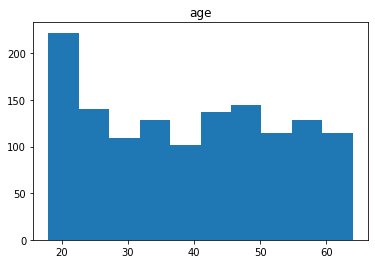

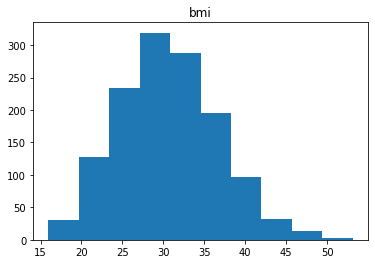

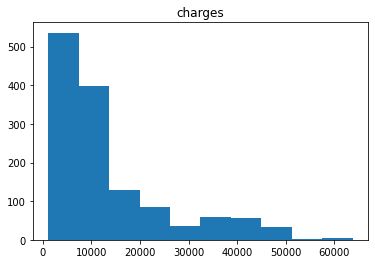

In [11]:
# Investigating distribution of numerical variables

for i in insurance_num.columns:
    plt.hist(insurance_num[i])
    plt.title(i)
    plt.show()

### Numerical Distributions 
Age: Seems evenly distributed
Bmi: Seems to form a normal distribution
Charges: Postiively skewed
    
Questions - Is there a reason we might want to normalize charges? Would it help with certain modelling?

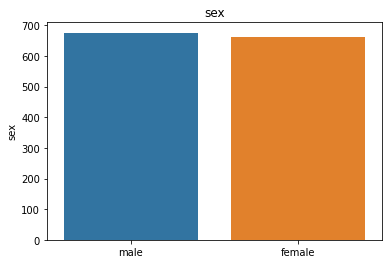

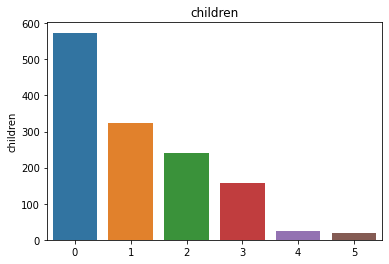

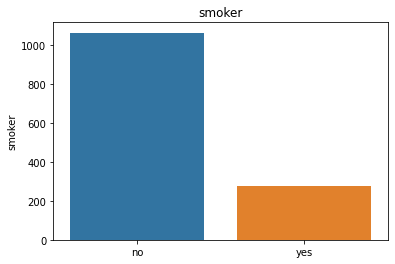

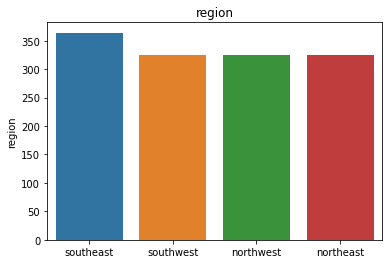

In [6]:
# Investigating distribution of categorical variables
for i in insurance_cat.columns:
    sns.barplot(x = insurance_cat[i].value_counts().index, y = insurance_cat[i].value_counts()).set_title(i)
    plt.show()

### Categorical Distributions 
Sex:  Expected - Evenly distributed
Children: Expected - Positively skewed
Smoker: Expected -Less smokers
Region: More samples in southeast - does not seem significant

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


c:\users\aaron\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

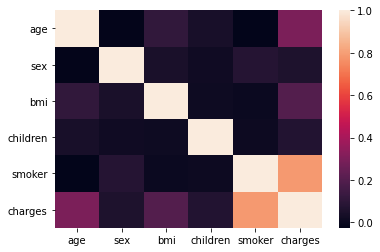

In [13]:
#To get the boolean variables in the correlation matrix - Update to 0 and 1's

insurance_corr = insurance[['age', 'sex', 'bmi', 'children','smoker', 'charges']]
insurance_corr['sex'] = insurance_corr['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_corr['smoker'] = insurance_corr['smoker'].apply(lambda x: 0 if x == 'no' else 1)

print(insurance_corr.corr())
sns.heatmap(insurance_corr.corr())

### Looking at the correlation matrix

Smoking: Seems to be strongly correlated with charges
Age: Seems to have a moderate correlation
Bmi: Seems to be moderately correlated as well

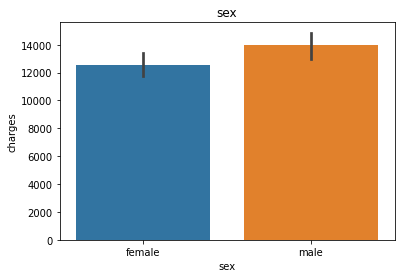

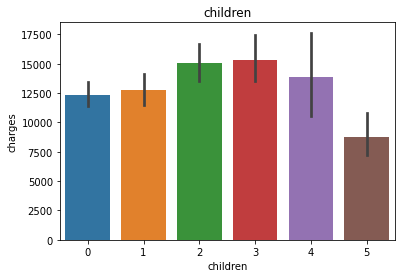

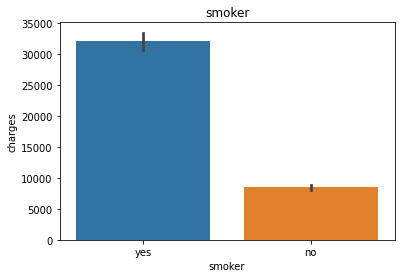

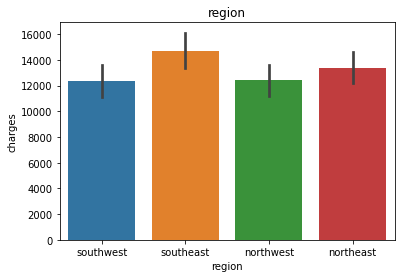

In [8]:
# Investigating how categorical valuables affect charges
    
for i in insurance_cat.columns:
    sns.barplot(x= i , y ="charges", data=insurance)
    plt.title(i)
    plt.show()    

### Unsure from graph which are statistically significant

As seen in the correlation matrix, smokers seem to have a significantly higher charges.

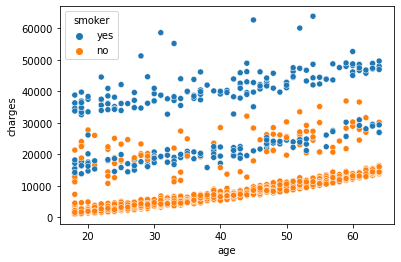

<AxesSubplot:xlabel='bmi', ylabel='charges'>

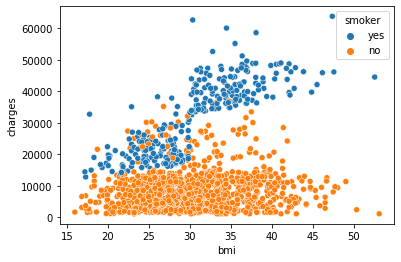

In [14]:
# Investigating contiunuos variables against charges.
# Added hue for smoke as our most significant variable.

sns.scatterplot(data=insurance, x="age", y="charges", hue="smoker")

plt.show()

sns.scatterplot(data=insurance, x="bmi", y="charges", hue="smoker")

### Analysis of continuos variables

#### Graph 1

Age seems to be linearly correlated with charges. The points seem to belong to three distinct linear groups.

All smokers belong to the top 2 sections.
All non-smokers belong to the bottom 2 sections. 

Smoking explains some of this variance but there seems to be another factor unseen in this graph. 

#### Graph 2

Although BMI is normally distributed, with charge trending upward as bmi increases, we can see schism when bmi crosses 30. 
The threshold to be marked as obese. Looking at the colours of the graph, it's clear that insurance cost significantly increases when bmi > 30 for smokers.

Looking at the numbers (charges>30,000), it seems like this group (Obese smokers), form the top most group in graph 1 with the highest insurance cost.

#### Comments
It seems fairly arbitrary that Smokers start getting a higher insurance cost when BMI crosses 30.
Actual health outcomes should be much more continuos and I'd expect insurance charges to go up in a more linear fashion.